In [1]:
import matplotlib.pyplot as plt

In [2]:
def SEIR(S0,E0,I0,R0,N,r,i,l,time):
        # COVID19 version, in which people in lateycy period are infectious
        # initial state
        S = S0; E = E0; I = I0; R = R0

        data = {'S':[S],'E':[E],'I':[I],'R':[R]}
        for t in range(time):
                h = 0.1 # h is the increment in Euler's method
                for j in range(int(1/h)):
                        infectious = I + E # this is equal to I in the original model. but for COVID19, we assume I + E that asymptomatic people are also infectious
                        #infectious = I # original SEIR model
                        S += h* (-(r/i)*(S/N)*infectious)
                        E += h* ((r/i)*(S/N)*infectious - (1/l)*E)
                        I += h* ((1/l)*E - (1/i)*I)
                        R += h* (1/i)*I
                data['S'].append(S)
                data['E'].append(E)
                data['I'].append(I)
                data['R'].append(R)
        return data

In [9]:
def Plot(data,param):
        x = range(len(data['S']))
        plt.plot(x,data['I'],marker='.',linestyle='none',label=param)
        plt.xlabel('days')
        plt.ylabel('Number of people in the infected state each day')

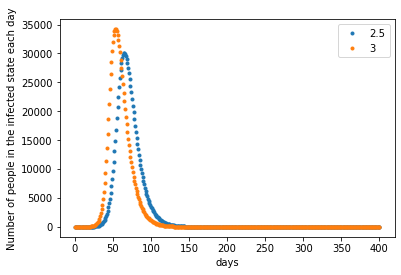

In [12]:
# Parameters
N = 100000.0 # population in Okinawa
time = 400
r_ls = [2.5,3] # basic reproduction rate
E0 = 0 # number of people in the latency period at day 0
I0 = 1 # number of people in the infected state at day 0
R0 = 0 # number of people in the recovered state at day 0
S0 = N - (E0 + I0 + R0) # number of people in the susceptible state at day 0

# Estimated parameters of coronavirus
i = 10.0 # average symptomatic period (days)
l = 5.0 # average latency period (days)

# Calculation
for r in r_ls:
        results = SEIR(S0,E0,I0,R0,N,r,i,l,time)
        Plot(results,r)
plt.legend()
plt.show()